In [1]:
#dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
#import data from combined csv
df = pd.read_csv('data/cleaned_data.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df.head(1)

,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,Country Code,Days to trend
0,2kyS6SvSYSE,2017-11-14,22,2017-11-13,748374,57527,2966,15954,US,1 days 00:00:00.000000000


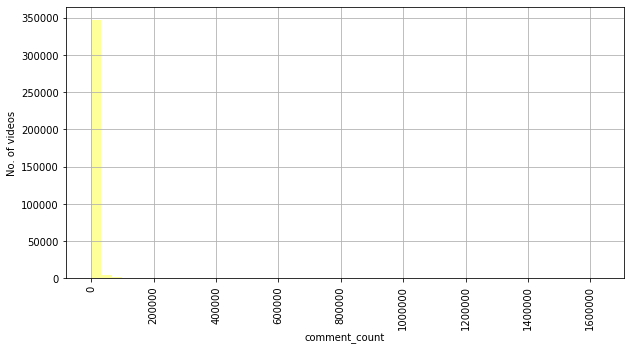

In [3]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(df["comment_count"], color="yellow",kde=False,ax=ax)
figure = ax.set(xlabel="comment_count", ylabel="No. of videos")
figure = plt.xticks(rotation=90)
plt.grid(axis='both')
plt.show(figure)

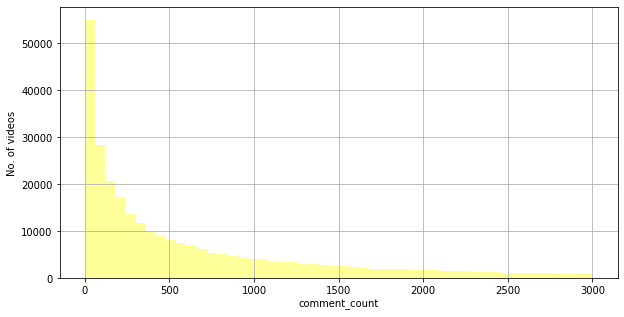

percentage of videos with likes less than 3000:


79.77934257795056

In [4]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(df[df["comment_count"] < 3000]["comment_count"], color="yellow",kde=False,
                      ax=ax)
figure = ax.set(xlabel="comment_count", ylabel="No. of videos")
plt.grid(axis='both')
plt.show(figure)
print("percentage of videos with likes less than 3000:")
df[df['comment_count'] < 3000]['comment_count'].count() / df['comment_count'].count() * 100